# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [18]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Regression Model Evaluation

In [21]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)

In [23]:
"""
CRIM - per capita crime rate by town
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS - proportion of non-retail business acres per town.
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX - nitric oxides concentration (parts per 10 million)
RM - average number of rooms per dwelling
AGE - proportion of owner-occupied units built prior to 1940
DIS - weighted distances to five Boston employment centres
RAD - index of accessibility to radial highways
TAX - full-value property-tax rate per $10,000
PTRATIO - pupil-teacher ratio by town
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT - % lower status of the population
MEDV - Median value of owner-occupied homes in $1000's"""

"\nCRIM - per capita crime rate by town\nZN - proportion of residential land zoned for lots over 25,000 sq.ft.\nINDUS - proportion of non-retail business acres per town.\nCHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)\nNOX - nitric oxides concentration (parts per 10 million)\nRM - average number of rooms per dwelling\nAGE - proportion of owner-occupied units built prior to 1940\nDIS - weighted distances to five Boston employment centres\nRAD - index of accessibility to radial highways\nTAX - full-value property-tax rate per $10,000\nPTRATIO - pupil-teacher ratio by town\nB - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town\nLSTAT - % lower status of the population\nMEDV - Median value of owner-occupied homes in $1000's"

In [25]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [27]:
# Your code here :
X = data.drop(columns=["MEDV"])  # Features (drop the target column)
y = data["MEDV"]  # Target variable (house price)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

In [31]:
# Your code here :
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [33]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [35]:
# Training set performance
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Testing set performance
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Training Performance:")
print(f"MAE: {train_mae}, MSE: {train_mse}, R²: {train_r2}")

print("\nTesting Performance:")
print(f"MAE: {test_mae}, MSE: {test_mse}, R²: {test_r2}")

Training Performance:
MAE: 3.3147716267832337, MSE: 21.641412753226316, R²: 0.7508856358979672

Testing Performance:
MAE: 3.1890919658879158, MSE: 24.291119474974067, R²: 0.6687594935356245


## 3. Calculate and print R-squared for both the training and the testing set.

In [37]:
# Your code here :
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"R-squared (Training): {train_r2}")
print(f"R-squared (Testing): {test_r2}")

R-squared (Training): 0.7508856358979672
R-squared (Testing): 0.6687594935356245


## 4. Calculate and print mean squared error for both the training and the testing set.

In [39]:
# Your code here :
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"Mean Squared Error (Training): {train_mse}")
print(f"Mean Squared Error (Testing): {test_mse}")

Mean Squared Error (Training): 21.641412753226316
Mean Squared Error (Testing): 24.291119474974067


## 5. Calculate and print mean absolute error for both the training and the testing set.

In [41]:
# Your code here :
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

print(f"Mean Absolute Error (Training): {train_mae}")
print(f"Mean Absolute Error (Testing): {test_mae}")

Mean Absolute Error (Training): 3.3147716267832337
Mean Absolute Error (Testing): 3.1890919658879158


## Classification Model Evaluation

In [43]:
from sklearn.datasets import load_iris
data = load_iris()

In [45]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [47]:
column_names = data.feature_names

In [49]:
df = pd.DataFrame(data['data'],columns=column_names)

In [51]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [53]:
target = pd.DataFrame(data.target)

In [55]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [57]:
data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## 6. Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [59]:
# Your code here :
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)  # Features
y = iris.target  # Target (flower class)

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display dataset shapes
print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Testing set: {X_test.shape}, {y_test.shape}")

Training set: (120, 4), (120,)
Testing set: (30, 4), (30,)


## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

In [63]:
# Your code here :
from sklearn.linear_model import LogisticRegression

# Train the model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

## 8. Calculate and print the accuracy score for both the training and the testing set.

In [65]:
# Your code here :
from sklearn.metrics import accuracy_score

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"Accuracy (Training): {train_acc}")
print(f"Accuracy (Testing): {test_acc}")

Accuracy (Training): 0.975
Accuracy (Testing): 0.9666666666666667


## 9. Calculate and print the balanced accuracy score for both the training and the testing set.

In [67]:
# Your code here :
from sklearn.metrics import balanced_accuracy_score

train_bal_acc = balanced_accuracy_score(y_train, y_train_pred)
test_bal_acc = balanced_accuracy_score(y_test, y_test_pred)

print(f"Balanced Accuracy (Training): {train_bal_acc}")
print(f"Balanced Accuracy (Testing): {test_bal_acc}")

Balanced Accuracy (Training): 0.975
Balanced Accuracy (Testing): 0.9666666666666667


## 10. Calculate and print the precision score for both the training and the testing set.

In [69]:
# Your code here :
from sklearn.metrics import precision_score

train_precision = precision_score(y_train, y_train_pred, average='weighted')
test_precision = precision_score(y_test, y_test_pred, average='weighted')

print(f"Precision (Training): {train_precision}")
print(f"Precision (Testing): {test_precision}")

Precision (Training): 0.9751928288513655
Precision (Testing): 0.9696969696969696


## 11. Calculate and print the recall score for both the training and the testing set.

In [71]:
# Your code here :
from sklearn.metrics import recall_score

train_recall = recall_score(y_train, y_train_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')

print(f"Recall (Training): {train_recall}")
print(f"Recall (Testing): {test_recall}")

Recall (Training): 0.975
Recall (Testing): 0.9666666666666667


## 12. Calculate and print the F1 score for both the training and the testing set.

In [73]:
# Your code here :
from sklearn.metrics import f1_score

train_f1 = f1_score(y_train, y_train_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

print(f"F1 Score (Training): {train_f1}")
print(f"F1 Score (Testing): {test_f1}")

F1 Score (Training): 0.9749960931395532
F1 Score (Testing): 0.9665831244778613


## 13. Generate confusion matrices for both the training and the testing set.

In [75]:
# Your code here :
from sklearn.metrics import confusion_matrix

train_cm = confusion_matrix(y_train, y_train_pred)
test_cm = confusion_matrix(y_test, y_test_pred)

print("Confusion Matrix (Training):")
print(train_cm)

print("\nConfusion Matrix (Testing):")
print(test_cm)

Confusion Matrix (Training):
[[40  0  0]
 [ 0 38  2]
 [ 0  1 39]]

Confusion Matrix (Testing):
[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]


## Bonus: For each of the data sets in this lab, try training with some of the other models you have learned about, recalculate the evaluation metrics, and compare to determine which models perform best on each data set.

In [77]:
# Have fun here !
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=3),
    "Support Vector Machine": SVC()
}

# Train and evaluate each model
from sklearn.metrics import accuracy_score

for name, model in models.items():
    model.fit(X_train, y_train)  # Train model
    y_pred = model.predict(X_test)  # Make predictions
    
    acc = accuracy_score(y_test, y_pred)  # Evaluate model
    print(f"{name}: Accuracy = {acc:.4f}")

Logistic Regression: Accuracy = 0.9667
Decision Tree: Accuracy = 0.9667
Random Forest: Accuracy = 0.9333
K-Nearest Neighbors: Accuracy = 1.0000
Support Vector Machine: Accuracy = 0.9667


In [79]:
from sklearn.metrics import classification_report

for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"\n{name}:\n")
    print(classification_report(y_test, y_pred))


Logistic Regression:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30


Decision Tree:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30


Random Forest:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2      

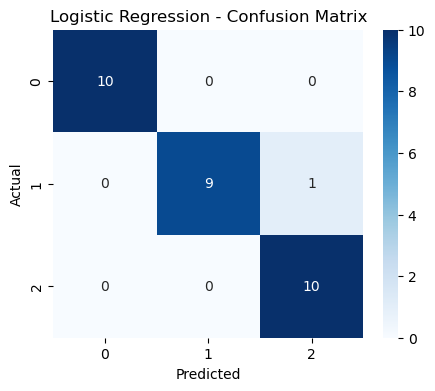

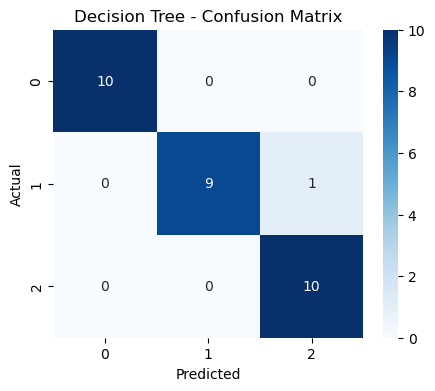

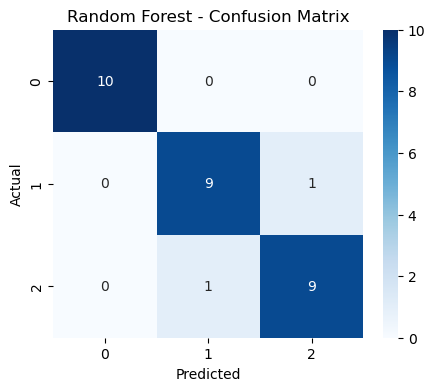

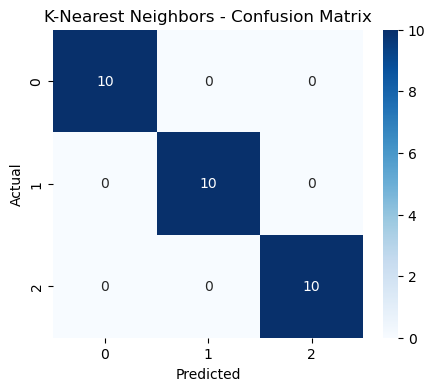

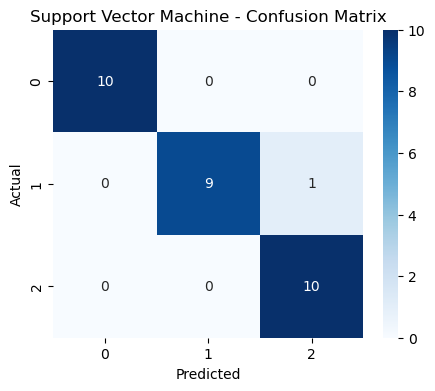

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

for name, model in models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()